In [1]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [2]:
# 한글 나눔포트 사용
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_excel('전주설문조사결과.xlsx')
df.head()

,1. 귀하의 나이는 어떻게 되십니까?,2. 귀하의 성별은 어떻게 되십니까?,3. 귀하의 평균 연간 여행 횟수는 몇 회 입니까?,"4. 전주시를 방문한 적이 있으십니까? 있다면, 어떤 목적이었습니까?",5. 전주시의 한옥마을과 같은 관광 명소나 축제에 대해 알고 계십니까?,6. 여행 정보는 주로 어디서 얻으십니까? (복수 응답 가능),7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능),"8. 전주 여행 시, 어떤 교통수단을 이용하시겠습니까?"
0,20대,여,연 2~3회,방문한 적이 없음,한옥 마을만 알고 있음,"인터넷\tSNS(페이스북, 인스타그램, 틱톡 등)","가족, 친척\t친구\t연인",렌트
1,30대,남,연 4회 이상,관광,한옥 마을만 알고 있음,"인터넷\tSNS(페이스북, 인스타그램, 틱톡 등)",혼자\t친구\t연인,자차
2,20대,남,연 4회 이상,방문한 적이 없음,한옥 마을만 알고 있음,"인터넷\tSNS(페이스북, 인스타그램, 틱톡 등)","가족, 친척\t친구\t연인",대중교통
3,40대,여,연 2~3회,친인척방문,"그 외 관광지나 축제에 대해 알고 있음(기타에 작성부탁드립니다)\t전주국제영화제, ...","인터넷\tTV\tSNS(페이스북, 인스타그램, 틱톡 등)","가족, 친척\t친구",자차
4,40대,여,연 1회,관광,한옥 마을만 알고 있음,인터넷,"가족, 친척",자차


In [7]:
df.columns.values

array(['1. 귀하의 나이는 어떻게 되십니까?', '2. 귀하의 성별은 어떻게 되십니까?',
       '3. 귀하의 평균 연간 여행 횟수는 몇 회 입니까?',
       '4. 전주시를 방문한 적이 있으십니까? 있다면, 어떤 목적이었습니까?',
       '5. 전주시의 한옥마을과 같은 관광 명소나 축제에 대해 알고 계십니까?',
       '6. 여행 정보는 주로 어디서 얻으십니까? (복수 응답 가능)',
       '7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)',
       '8. 전주 여행 시, 어떤 교통수단을 이용하시겠습니까?'], dtype=object)

In [15]:
len(df['1. 귀하의 나이는 어떻게 되십니까?'].unique())

6

In [29]:
to_categorical(df['2. 귀하의 성별은 어떻게 되십니까?'].values)

ValueError: invalid literal for int() with base 10: '여'

In [23]:
from tensorflow.keras.utils import to_categorical
for i in df.columns.values:
    pd.get_dummies(df[i],drop_first=True)

In [30]:
df2 = pd.get_dummies(df,drop_first=True)

In [40]:
# sc = StandardScaler()
# cc_scaled = sc.fit_transform(df)
df3 = df2.copy()
kmeans = KMeans(n_clusters=3, random_state=7)
clusters = kmeans.fit(df3)
df2['cluster'] = clusters.labels_
df2.groupby('cluster').count()

,1. 귀하의 나이는 어떻게 되십니까?_20대,1. 귀하의 나이는 어떻게 되십니까?_30대,1. 귀하의 나이는 어떻게 되십니까?_40대,1. 귀하의 나이는 어떻게 되십니까?_50대,1. 귀하의 나이는 어떻게 되십니까?_60대 이상,2. 귀하의 성별은 어떻게 되십니까?_여,3. 귀하의 평균 연간 여행 횟수는 몇 회 입니까?_연 1회,3. 귀하의 평균 연간 여행 횟수는 몇 회 입니까?_연 2~3회,3. 귀하의 평균 연간 여행 횟수는 몇 회 입니까?_연 4회 이상,"3. 귀하의 평균 연간 여행 횟수는 몇 회 입니까?_한 적이 없지만, 앞으로 하고 싶음",...,7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)_혼자,"7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)_혼자\t가족, 친척","7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)_혼자\t가족, 친척\t친구\t연인",7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)_혼자\t연인,7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)_혼자\t친구,7. 같이 여행하는 일행과의 관계는 어떻게 되십니까? (복수 응답 가능)_혼자\t친구\t연인,"8. 전주 여행 시, 어떤 교통수단을 이용하시겠습니까?_렌트","8. 전주 여행 시, 어떤 교통수단을 이용하시겠습니까?_없음","8. 전주 여행 시, 어떤 교통수단을 이용하시겠습니까?_자차","8. 전주 여행 시, 어떤 교통수단을 이용하시겠습니까?_친구차"
cluster,,,,,,,,,,,,,,,,,,,,,
0,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
1,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
2,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


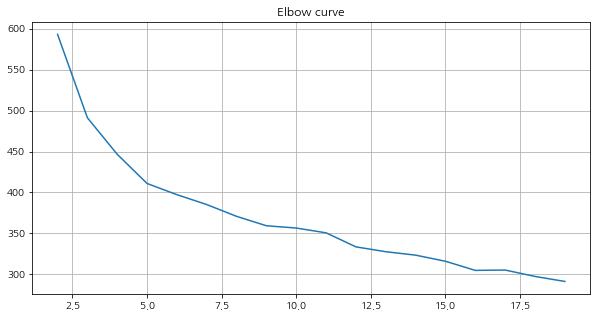

In [33]:
distortions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [60]:
kk = df2.groupby('cluster').mean()

In [62]:
kk.to_excel('전주시클러스터링.xlsx')

In [41]:
pca = PCA(n_components=2)
X = df2.drop('cluster',axis=1)
y = df2.loc[:,'cluster']
reduced_df = pca.fit_transform(X)
reduced_df.shape

(130, 2)

In [42]:
scaled_df = pd.DataFrame(reduced_df)

In [43]:
scaled_df['cluster']=df2['cluster']

In [44]:
scaled_df

,0,1,cluster
0,1.395231,-0.364743,0
1,-0.250435,1.246680,2
2,1.338944,0.650374,0
3,-0.349315,-0.965239,1
4,-1.088275,-0.192727,1
...,...,...,...
125,0.904972,0.367052,0
126,-1.016273,-0.728144,1
127,-0.623773,-0.315001,1
128,-0.112034,-0.321271,1


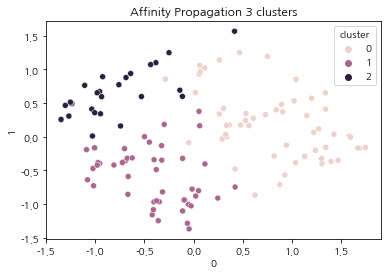

Silhouette Coefficient: 0.1001
Davies Bouldin Index: 2.5839


In [47]:
# ap = AffinityPropagation()
# cluster = ap.fit(scaled_df)
# cluster_id = pd.DataFrame(cluster.labels_)

# d5 = pd.DataFrame()
# d5 = pd.concat([scaled_df,cluster_id],axis=1)
#d5.columns = [0, 1, "cluster"]

sns.scatterplot(x=scaled_df[0], y=scaled_df[1], hue = scaled_df['cluster'], legend="full")
plt.title('Affinity Propagation {} clusters'.format(len(scaled_df.cluster.unique())))
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(df2.iloc[:,:-1], df2['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(df2.iloc[:,:-1], df2['cluster'])))